# <strong> TRABAJO PRÁCTICO 1: </strong> GRUPO 22

## Inicializacion del DataSet

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')
pd.set_option('display.float_format', '{:,.2f}'.format)

url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2025_processed.csv'
df = pd.read_csv(url)

df[:10]

,Unnamed: 0,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,salir_o_seguir_contestando_sobre_las_guardias,work_on_call_duty,salary_on_call_duty_charge,aclara_el_numero_que_ingresaste_en_el_campo_anterior,profile_age,profile_gender,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,0,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),"6,500,000.00","5,800,000.00",Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,45,Hombre Cis,Sí,True,Senior,"6,500,000.00"
1,1,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,"12,700,000.00","10,200,000.00",Cobro todo el salario en dólares,NaN,Un sueldo,Performance de la compañía,...,Terminar encuesta,No,0.00,Bruto,32,Mujer Cis,Sí,True,Senior,"12,700,000.00"
2,2,Córdoba,Full-Time,Staff (planta permanente),"3,952,805.00","3,137,662.00",Cobro parte del salario en dólares,985,No,No recibo bono,...,NaN,NaN,NaN,NaN,29,Hombre Cis,Sí,True,Semi-Senior,"3,952,805.00"
3,3,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),"1,606,000.00","1,360,000.00",Cobro parte del salario en dólares,1004,No,No recibo bono,...,NaN,NaN,NaN,NaN,25,Hombre Cis,Sí,True,Semi-Senior,"1,606,000.00"
4,4,Córdoba,Full-Time,Tercerizado (trabajo a través de consultora o ...,"1,325,301.00",NaN,Cobro parte del salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,22,Hombre Cis,Sí,True,Senior,"1,325,301.00"
5,5,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),"2,670,205.00","2,167,989.00",Cobro parte del salario en dólares,986,No,No recibo bono,...,Terminar encuesta,No,0.00,Porcentaje de mi sueldo bruto,48,Hombre Cis,Sí,True,Senior,"2,670,205.00"
6,6,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),"4,000,000.00","4,000,000.00",Cobro todo el salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,No,0.00,Bruto,50,Hombre Cis,Sí,True,Senior,"4,000,000.00"
7,7,Córdoba,Full-Time,Staff (planta permanente),"4,200,000.00","3,600,000.00",Cobro parte del salario en dólares,1070,No,No recibo bono,...,Responder sobre guardias,"Sí, pasiva",0.00,Porcentaje de mi sueldo bruto,43,Hombre Cis,Sí,True,Senior,"4,200,000.00"
8,8,Buenos Aires,Full-Time,Freelance,"3,000,000.00","2,000,000.00",Mi sueldo está dolarizado (pero cobro en moned...,1150,No,No recibo bono,...,NaN,NaN,NaN,NaN,41,Hombre Cis,No,True,Senior,"3,000,000.00"
9,9,Buenos Aires,Full-Time,Staff (planta permanente),"3,953,142.06","3,258,576.49",Mi sueldo está dolarizado (pero cobro en moned...,NaN,Un sueldo,Performance de la compañía,...,NaN,NaN,NaN,NaN,47,Hombre Cis,Sí,True,Senior,"3,953,142.06"


# <strong> Ejercicio 1 - Análisis descriptivo </strong>

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 300000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 1000K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# <strong> Ejercicio 1 - Análisis descriptivo
## Resolución de lo solicitado:

1. Las columnas relevantes del dataset que seleccionamos son:
 * Lenguajes de programacion
 * Salario Bruto. Tomando como premisa que una parte relevante de la comunidad puede trabajar para el exterior o tal vez no lo hace en relacion de dependencia, seleccionamos el **salario bruto** como columna relevante. <br>

<left> *Utilizamos además parte del codigo brindado para facilitar el proceso.*</left>

In [2]:
# Columnas relevantes que deseamos analizar
salary_col = 'salary_monthly_BRUTO'
relevant_columns = ['tools_programming_languages', salary_col]

# Definimos una funcion que convierte el string separado por comas en
#"tools_programming_languages" en una lista de strings y limpia los campos
#no utiles como "ninguno de los anteriores".
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Utilizamos la funcion definida antes para crear una nueva columna con la lista
# de lenguajes.
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

df[relevant_columns][:5]

,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
0,Ninguno de los anteriores,"6,500,000.00",[]
1,"CSS, HTML, Java, Javascript, SQL, TypeScript","12,700,000.00","[css, html, java, javascript, sql, typescript]"
2,SQL,"3,952,805.00",[sql]
3,"Bash/Shell, CSS, HTML, Javascript, PHP, Python","1,606,000.00","[bash/shell, css, html, javascript, php, python]"
4,"Bash/Shell, Python","1,325,301.00","[bash/shell, python]"


2. Filtramos las filas que consideramos que no son útiles para nuestro analisis, ya que pueden contener datos erroneos o extremos.  

    2.1. Analizamos los salarios del set de datos original.

In [3]:
df['salary_monthly_BRUTO'].describe()

,salary_monthly_BRUTO
count,"5,196.00"
mean,"2,728,422.73"
std,"1,780,241.38"
min,"150,000.00"
25%,"1,500,000.00"
50%,"2,290,000.00"
75%,"3,500,000.00"
max,"13,500,000.00"


(0.0, 13500000.0)

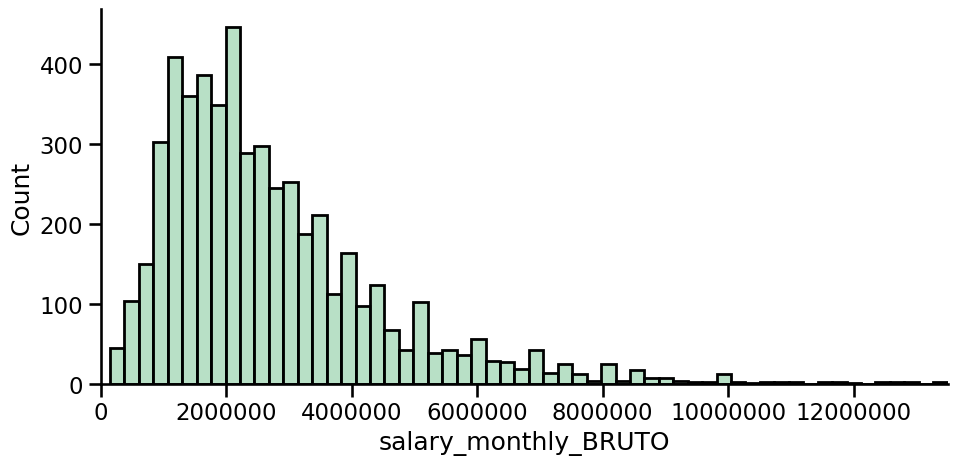

In [4]:
maximo=max(df[salary_col])
seaborn.displot(df[salary_col], aspect=2,color = "#A0D6B4",edgecolor = "black",
             linewidth = 2)

## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')
plt.xlim((0,maximo))#100000000

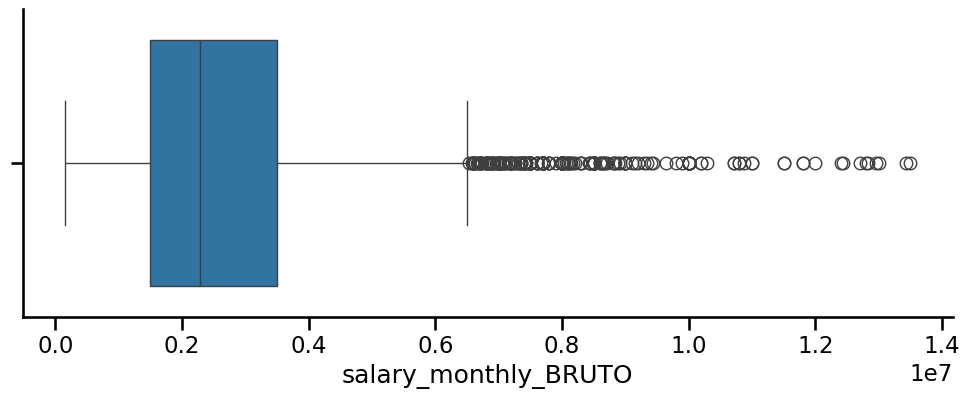

In [5]:
# veamos un boxplot
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[salary_col])
seaborn.despine()

## Resumen del análisis de los puntos 2 y 2.1
De los graficos anteriores podemos validar que tenemos muchos datos extremos, y con la finalidad de simplificar la respuesta acotaremos los datos.<br>
* Utilizaremos el salario minimo vital y movil de diciembre 2024 de Argentina ($279.718) como cota inferior, ya que estimamos que cualquier persona con una situacion laboral estandar debería cobrar lo minimo estipulado por la ley.
* Como cota superior seleccionamos el cuartil superior(Q3 = 75% de los datos) mas 1.5 veces el rango inter cuartil (1.5\*RIC) es decir, excluimos los datos considerados anómalos por el propio boxplot. (Q3 + 1,5*RIC)

In [6]:
Q3 = df[salary_col].quantile(0.75)
RIC = Q3 - df[salary_col].quantile(0.25)
maximo = Q3 + 1.5 * RIC
minimo = 279718 # SMVyM

df_clean = df[df[salary_col] <= maximo]
df_clean = df_clean[df_clean[salary_col] >= minimo]

df_clean[salary_col].describe()

,salary_monthly_BRUTO
count,"4,943.00"
mean,"2,495,133.98"
std,"1,331,957.58"
min,"290,000.00"
25%,"1,500,000.00"
50%,"2,200,000.00"
75%,"3,280,618.50"
max,"6,500,000.00"


Para brindar mas detalle y reforzar el resumen de los puntos 2 y 3, realizamos la comparativa entre el set de datos limpio y el original, para confirmar nuestra premisa.

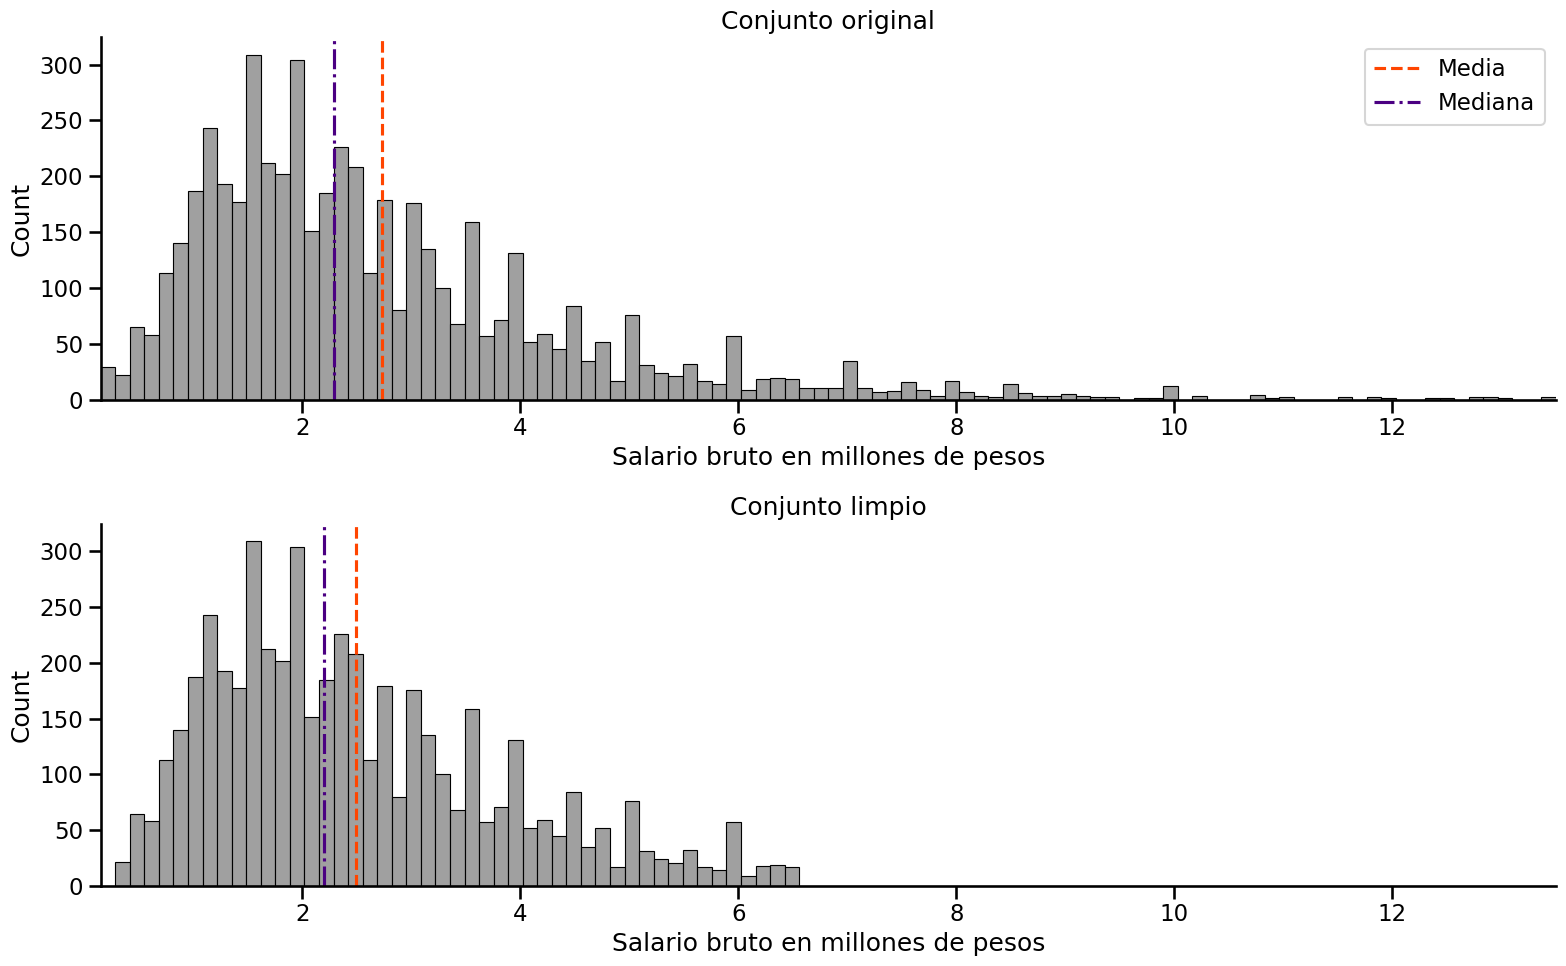

In [7]:
# Definir los límites mínimos y máximos globales
x_min = min(df[salary_col].min(), df_clean[salary_col].min())
x_max = max(df[salary_col].max(), df_clean[salary_col].max())

# Definir bins iguales (ej. 100 bins entre x_min y x_max)
n_bins = 100
bins = numpy.linspace(x_min, x_max, n_bins + 1)

# Crear gráficos
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))

# Histograma original
seaborn.histplot(df[salary_col], bins=bins, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered', linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo', linestyle='-.', label='Mediana')
axes[0].set_title("Conjunto original")

# Histograma limpio
seaborn.histplot(df_clean[salary_col], bins=bins, ax=axes[1], color='gray')
axes[1].axvline(df_clean[salary_col].mean(), color='orangered', linestyle='--', label='Media')
axes[1].axvline(df_clean[salary_col].median(), color='indigo', linestyle='-.', label='Mediana')
axes[1].set_title("Conjunto limpio")

# Calcular y aplicar límites Y iguales
y_max = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
for ax in axes:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)
    ax.set_xlabel("Salario bruto en millones de pesos")
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}'))

axes[0].legend()
seaborn.despine()
plt.tight_layout()
plt.show()


Habiendo limpiado los valores atípicos, ponemos foco en los lenguajes de programacion más populares.

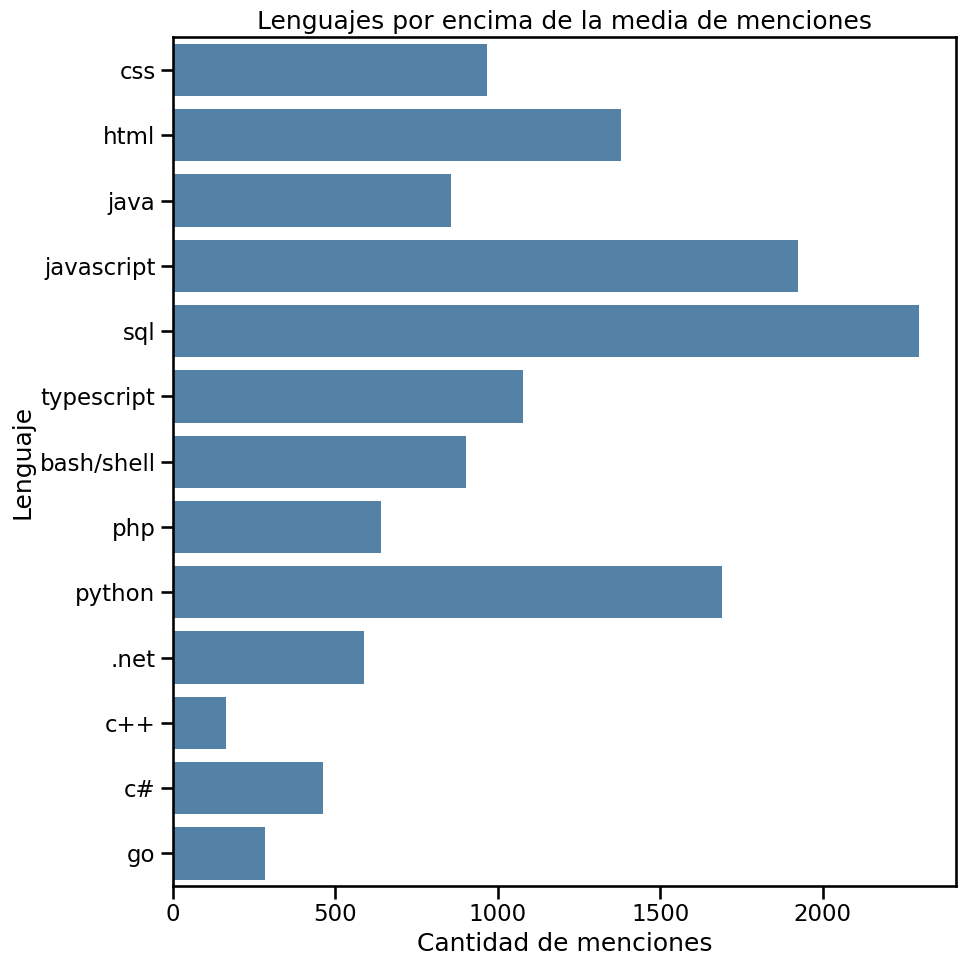

In [8]:
# Si duplicamos cada fila por cada lenguaje mencionado en su respuesta
# obtendremos un dataframe util para analizar cada lenguaje individualmente.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})

# Contamos la cantidad de gente que tiene conocimientos en cada lenguaje. nos
#vamos a centrar solo en aquellos sobre la media y descartaremos los que tienen
#solo un voto para obviar informacion irrelevante.
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

interesting_languages = language_count[language_count['count'] > 1]
interesting_languages = interesting_languages[interesting_languages['count'] >= interesting_languages['count'].mean()]

# Crearemos una lista con los lenguajes que nos interesan
interesting_languages_list = interesting_languages['frequency'].to_list()

# Filtrar df_lang para que solo contenga los lenguajes interesantes
filtered_df_lang = df_lang[df_lang['programming_language'].isin(interesting_languages_list)]

# Crear el gráfico solo con esos lenguajes
fig = plt.figure(figsize=(10, 10))
seaborn.countplot(y=filtered_df_lang['programming_language'], color='steelblue')
plt.title("Lenguajes por encima de la media de menciones")
plt.xlabel("Cantidad de menciones")
plt.ylabel("Lenguaje")
plt.tight_layout()
plt.show()


In [9]:
# Filtraremos las filas que no tengan mencion de los interesados.
df_filtered = df_clean[df_clean['cured_programming_languages'].apply(lambda langs: any(lang in interesting_languages_list for lang in langs))]
df_filtered[relevant_columns][:5]

,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
2,SQL,"3,952,805.00",[sql]
3,"Bash/Shell, CSS, HTML, Javascript, PHP, Python","1,606,000.00","[bash/shell, css, html, javascript, php, python]"
4,"Bash/Shell, Python","1,325,301.00","[bash/shell, python]"
6,".NET, Python, SQL","4,000,000.00","[.net, python, sql]"
7,"C++, Python","4,200,000.00","[c++, python]"


A continuación mostramos el resultado de limpiar los lenguajes menos populares comparando el data set limpio sin los datos atipicos.

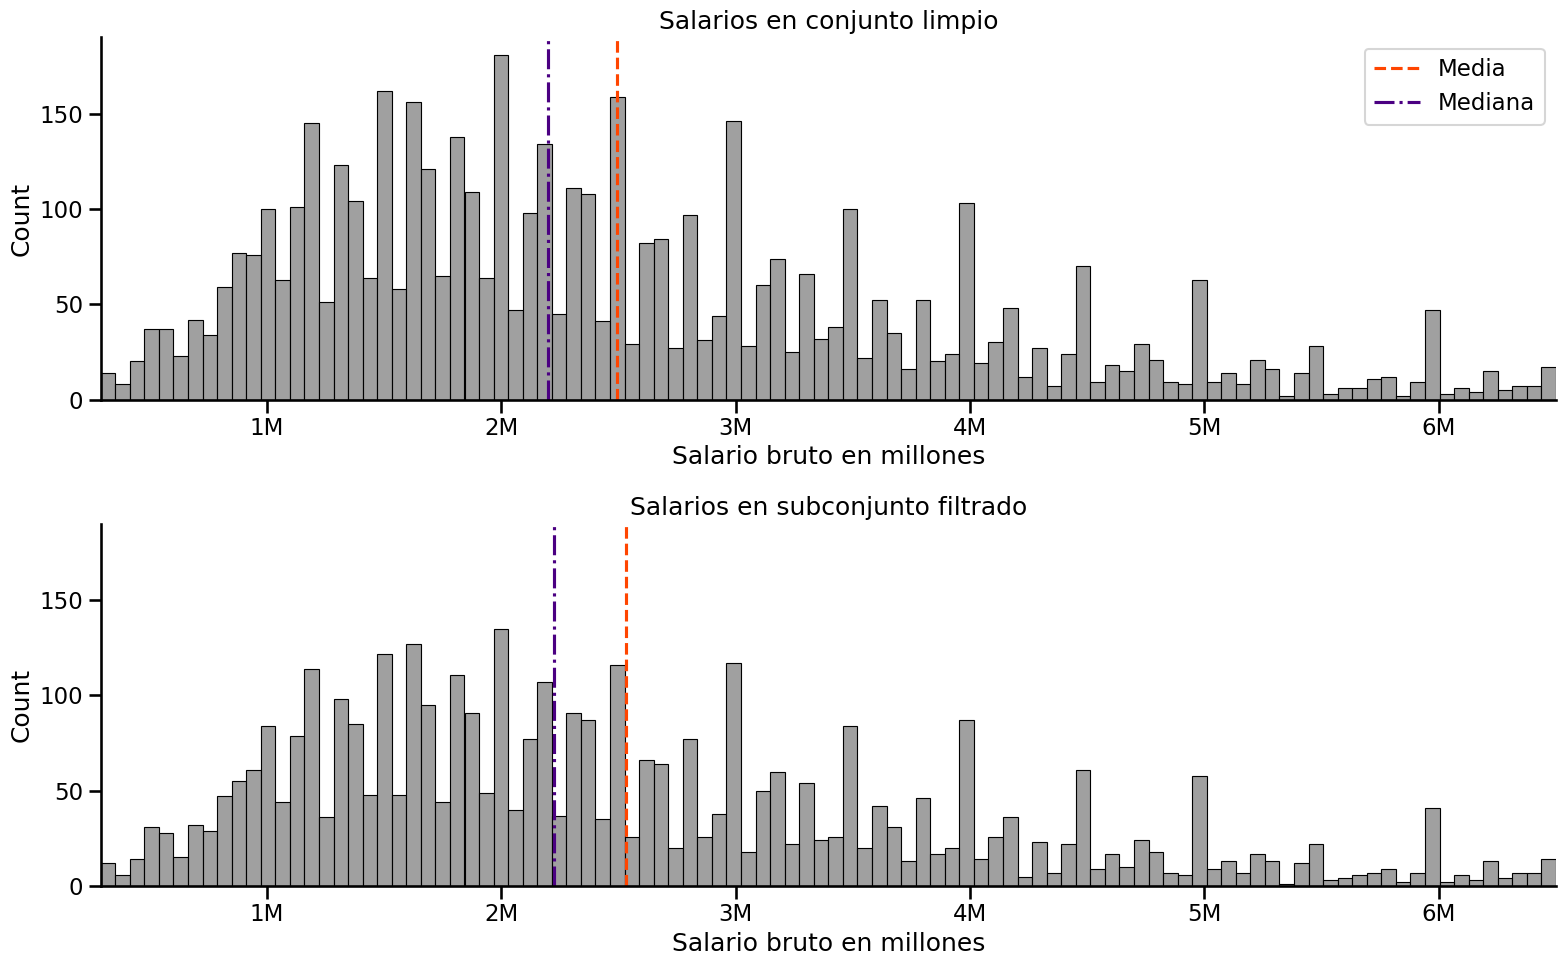

In [10]:

# 1. Calcular el mínimo y máximo global
x_min = min(df_clean[salary_col].min(), df_filtered[salary_col].min())
x_max = max(df_clean[salary_col].max(), df_filtered[salary_col].max())

# 2. Definir bins comunes (ejemplo: 100 bins)
n_bins = 100
bins = numpy.linspace(x_min, x_max, n_bins + 1)

# 3. Crear subplots comparables
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))

# Gráfico para df_clean
seaborn.histplot(df_clean[salary_col], bins=bins, ax=axes[0], color='gray')
axes[0].axvline(df_clean[salary_col].mean(), color='orangered', linestyle='--', label='Media')
axes[0].axvline(df_clean[salary_col].median(), color='indigo', linestyle='-.', label='Mediana')
axes[0].set_title("Salarios en conjunto limpio")

# Gráfico para df_filtered
seaborn.histplot(df_filtered[salary_col], bins=bins, ax=axes[1], color='gray')
axes[1].axvline(df_filtered[salary_col].mean(), color='orangered', linestyle='--', label='Media')
axes[1].axvline(df_filtered[salary_col].median(), color='indigo', linestyle='-.', label='Mediana')
axes[1].set_title("Salarios en subconjunto filtrado")

# 4. Ajustar límites del eje X e Y para que sean iguales en ambos
y_max = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
for ax in axes:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)
    ax.set_xlabel("Salario bruto en millones")
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))

# Mostrar leyenda y mejorar visual
axes[0].legend()
seaborn.despine()
plt.tight_layout()
plt.show()


Aunque la diferencia es casi imperceptible, podemos ver:
* Que disminuyo la cantidad de registros por cada rango salarial
* Que la media y mediana se movieron levemente a la derecha (segun una distribución normal, tiene una asíntota a la derecha).

## 3. Selección de métricas
Ahora mostramos el trabajo asociado a la selección de métricas que que nos ayudaran a analizar las variables y responder la consigna 3.


In [11]:
# Volvamos a definir df_lang ahora con el dataset limpio para poder hacer
# analisis sobre cada lenguaje individual
df_lang = df_filtered.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_filtered[relevant_columns])\
    .rename(columns={0: 'programming_language'})
df_lang2 = df_lang[df_lang.programming_language.isin(interesting_languages_list)]

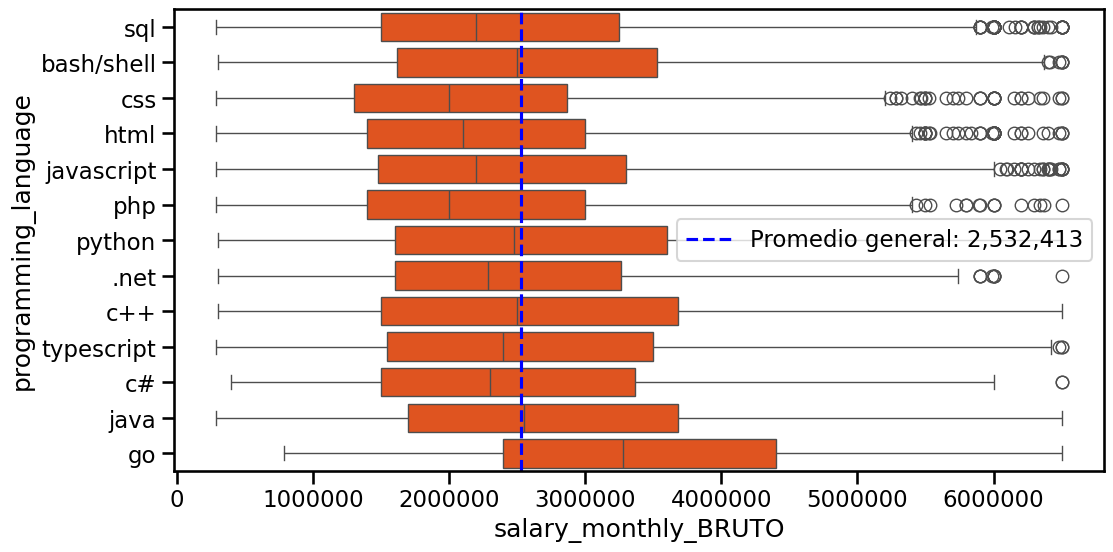

In [12]:
# Calculamos el promedio general (de toda la columna de salario)
mean_salary = df_filtered[salary_col].mean()

# Graficamos el boxplot
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_lang2, x=salary_col, y='programming_language', color='orangered')

# Línea vertical punteada en el promedio
plt.axvline(mean_salary, color='blue', linestyle='--', label=f'Promedio general: {mean_salary:,.0f}')

# Estilo del eje X
plt.ticklabel_format(style='plain', axis='x')

plt.legend()
plt.show()


### Resumen punto 3
Gracias al grafico anterior podemos inferir que de los "lenguajes populares" que superan la media de salario bruto son;
 * go ocupando el primer lugar
 * java ocupando la media y posteriormente el resto
 * c++
 * python <br>
 Decidimos no tener en cuenta bash/shell, ya que consideramos que es una habilidad complementaria al de un lenguaje de desarrollo. <br>


  ### Si bien consideramos que con el resumen del punto 3 podiamos terminar el analisis,continuamos el mismo, sumando la distribucion de sueldos de los otros lenguajes. (solo porque queriamos confirmar presunciones 😁)

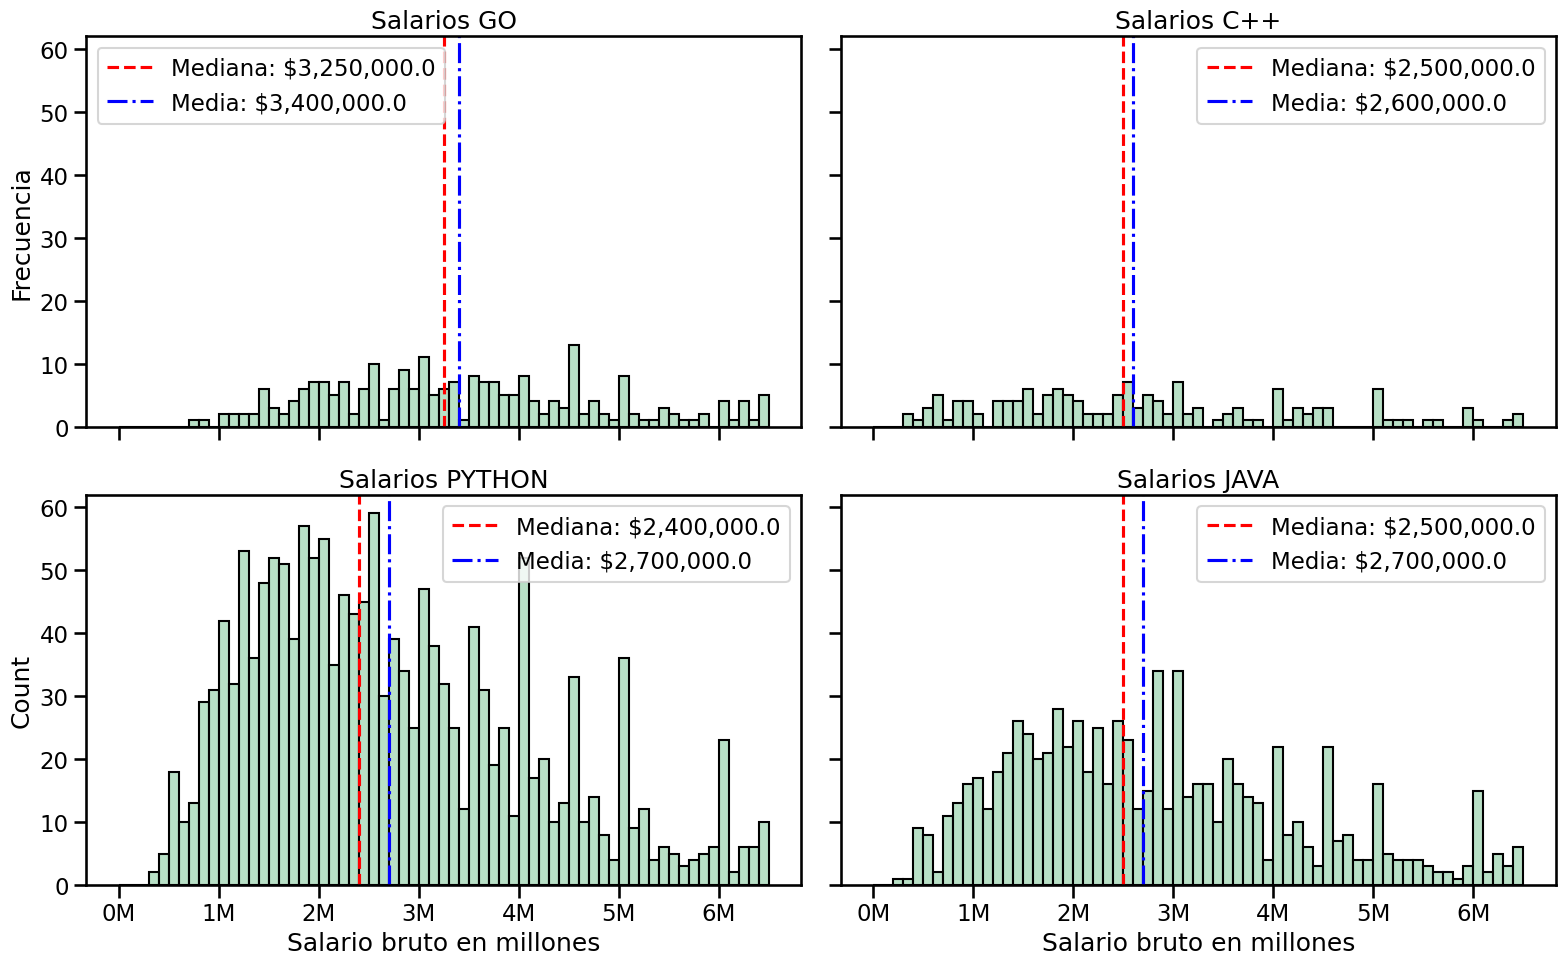

In [13]:
languages = ['go', 'c++', 'python', 'java']
bin_size = 100_000

# Determinar el salario máximo para estandarizar bins
max_salary = df_lang2[salary_col].max()
bins = range(0, int(max_salary + bin_size), bin_size)

# Crear figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()  # Aplanar para iterar fácilmente

for i, lang in enumerate(languages):
    df_lang = df_lang2[df_lang2['programming_language'] == lang]

    # Redondear salarios
    rounded_salaries = (df_lang[salary_col] // bin_size) * bin_size

    # Mediana y media aproximadas
    approx_median = rounded_salaries.median()
    approx_mean = (df_lang[salary_col].mean() // bin_size) * bin_size

    # Histograma
    seaborn.histplot(
        rounded_salaries,
        bins=bins,
        color="#A0D6B4",
        edgecolor="black",
        linewidth=1.5,
        ax=axes[i]
    )

    # Líneas verticales
    axes[i].axvline(approx_median, color="red", linestyle="--", label=f"Mediana: ${approx_median:,}")
    axes[i].axvline(approx_mean, color="blue", linestyle="-.", label=f"Media: ${approx_mean:,}")

    # Estética
    axes[i].set_title(f"Salarios {lang.upper()}")
    axes[i].set_xlabel("Salario bruto en millones")
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
    axes[i].legend()

# Etiqueta Y en el primer gráfico
axes[0].set_ylabel("Frecuencia")

# Ajustes finales
plt.tight_layout()
plt.show()


## Conclusión de la presunción <br>
Verificamos con claridad que Go es el lenguaje con mejores salarios tendiendo en cuenta la media y mediana, sin enbargo al igual que C++, es un lenguaje con pocos representantes en la encuesta, lo que podria significar que es mas dificil encontrar trabajo en dichos lenguajes o que la encuesta se encuentra sesgada.

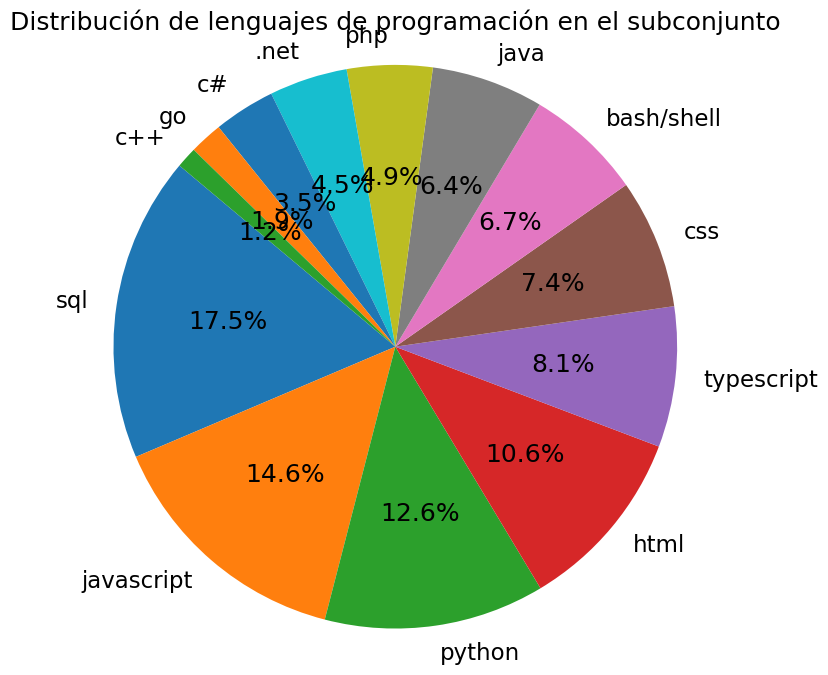

In [14]:
# Contar cuántas veces aparece cada lenguaje
language_counts = df_lang2['programming_language'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de lenguajes de programación en el subconjunto')
plt.axis('equal')  # Para que quede como un círculo perfecto
plt.show()


podemos ver que de los lenguajes que seleccionamos como "populares" Go apenas representa el 1.9% y C++ el 1.2%, mientras que java el 6.4% y finalmente python el 12.6%. Por lo que en caso de encontrarse en una busqueda laboral probablemente Python ó java serian una mejor eleccion.

## Como conclusión General, y teniendo en cuenta la pregunta sobre los salarios podemos afirmar:  

 De los lenguajes de programacion mas populares los lenguajes asociados a los mejores salarios son:
  - **Go** con una media salarial de \$3,400,000 y una mediana de \$3,250,000.
  - **Java** con una media salarial de \$2,700,000 y una mediana de \$2,500,000.
  - **Python** con una media salarial de \$2,700,000 y una mediana de \$2,400,000.
  - **C++** con una media salarial de \$2,600,000 y una mediana de \$2,500,000.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

utilizaremos el 'df_filtered' calculado del ejercicio anterior para ahorrar trabajo, ya que ya tiene las columnas y filas relevantes seleccionadas. Por lo que el siguiente ejercicio estara centrado sobre el subconjunto que posee conocimiento de "los lenguajes mas populares".

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




Las herramientas visuales y modelos que podemos utilizar para estudiar la distribucion y comportamiento de los datos son:
- Las **Medidas de tendencia central**, como la media, mediana y moda.
- Las **Medidas de posicion**, como los cuartiles Q1(25%), Q2(50%) y Q3(75%).
- Las **Medidas de dispersion**, como la varianza muestral, la desviacion estandar y el coeficiente de variacion.
- y los **Modelos de distribucion**, como son el normal o gaussiano, el exponencial y el chi cuadrado.
- y respecto a herramientas visuales podemos mencionar los hitogramas y boxplot.

como variables numericas utilizaremos: edad, años de experiencia y salario bruto.  
como variables categoricas utilizaremos: nivel de estudios y genero.

Como primer paso, analizaremos la relacion entre el nivel de estudios y el sueldo bruto.

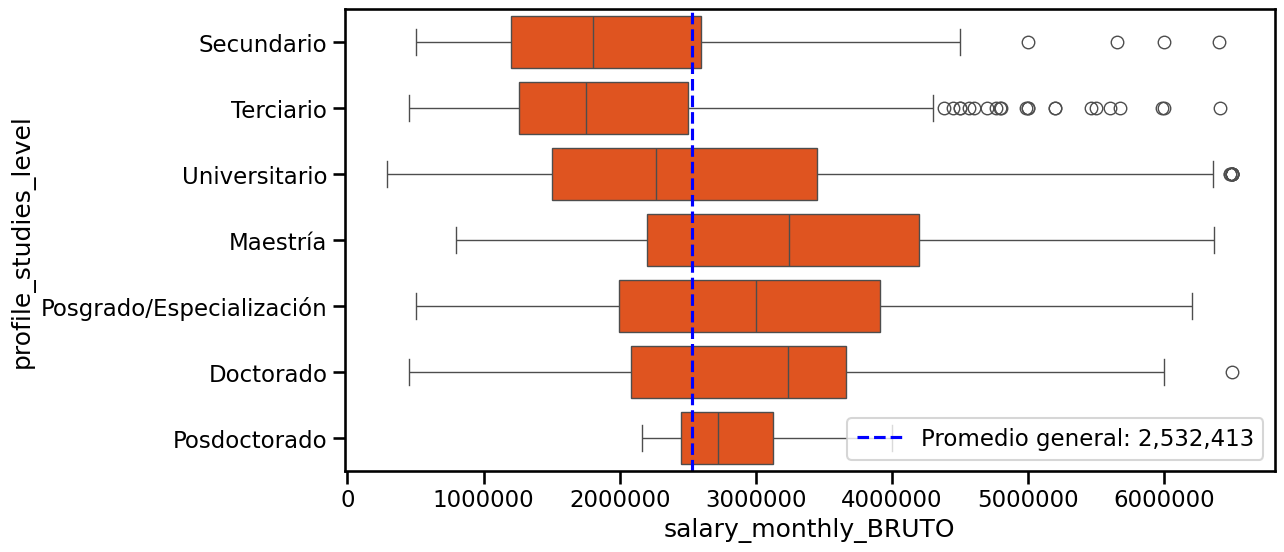

In [15]:
#lista de los nombres de categorías ordenadas
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario',
                         'Maestría','Posgrado/Especialización', 'Doctorado', 'Posdoctorado']

# Calculamos el promedio general (de toda la columna de salario)
mean_salary = df_filtered[salary_col].mean()

# Graficamos el boxplot
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_filtered, x=salary_col, y='profile_studies_level', color='orangered', order=sorted_studies_levels)

# Línea vertical punteada en el promedio
plt.axvline(mean_salary, color='blue', linestyle='--', label=f'Promedio general: {mean_salary:,.0f}')

# Estilo del eje X
plt.ticklabel_format(style='plain', axis='x')

plt.legend()
plt.show()

De la visualizacion anterior podemos notar que, aunque en general mientras mayor nivel de estudios se posee un mejor salario, no siempre se cumple ya que comparando doctorado con posdoctorado podemos notar que los primeros son mejor pagados.

Seguido, analizaremos la relacion entre el genero y la edad.

<ipython-input-16-ccce009a7e82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['profile_gender'] = df_filtered['profile_gender'].replace({


([0, 1, 2],
 [Text(0, 0, 'Hombre Cis'),
  Text(1, 0, 'Mujer Cis'),
  Text(2, 0, 'Diversidades')])

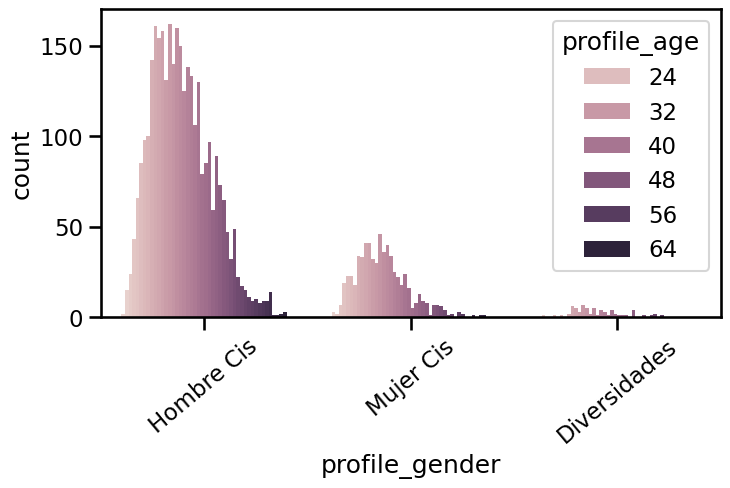

In [16]:
# Agrupación simplificada de géneros
df_filtered['profile_gender'] = df_filtered['profile_gender'].replace({
    'No binarie': 'Diversidades',
    'Trans': 'Diversidades',
    'Queer': 'Diversidades',
    'Lesbiana': 'Diversidades',
    'Agénero': 'Diversidades',
    'Prefiero no decir': 'Diversidades',
}).fillna('Diversidades')  # En caso de valores no listados

# Limpiamos los valores de edad erroneos
df_filtered = df_filtered[df_filtered.profile_age<=65]
df_filtered = df_filtered[df_filtered.profile_age>=18]

# Graficamos
fig = plt.figure(figsize=(8,4))
seaborn.countplot(x= df_filtered.profile_gender,  hue=df_filtered.profile_age[df_filtered.profile_age<65])
plt.xticks(rotation=40)

In [17]:
edad_media_hombre = df_filtered[df_filtered.profile_gender=='Hombre Cis'].profile_age.mean()
print('Edad media de los hombres cis:',round(edad_media_hombre))
edad_media_mujer = df_filtered[df_filtered.profile_gender=='Mujer Cis'].profile_age.mean()
print('Edad media de las mujeres cis:',round(edad_media_mujer))
edad_media_diversidades = df_filtered[df_filtered.profile_gender=='Diversidades'].profile_age.mean()
print('Edad media de las diversidades:',round(edad_media_diversidades))

Edad media de los hombres cis: 35
Edad media de las mujeres cis: 34
Edad media de las diversidades: 36


Podemos ver que el genero parece no tener un impacto relevante en cuanto a la edad, sin enbargo hay una muy pequeña tendencia de las mujeres a ser mas jovenes.

Por ultimo analizaremos la relacion entre los años de experiencia, el salario y el genero.

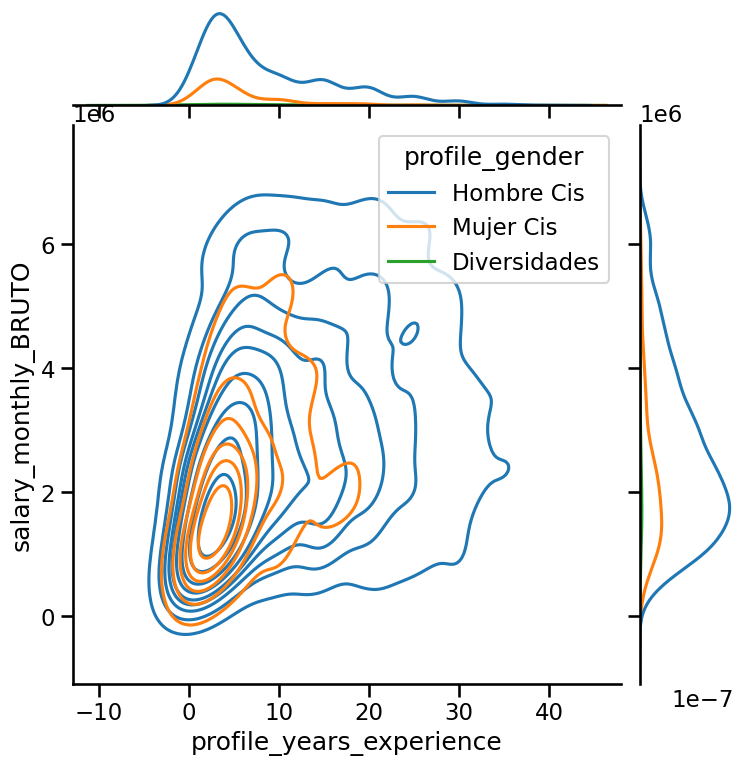

In [18]:
#Limpiamos los valores de años de experiencia erroneos
df_filtered = df_filtered[df_filtered.profile_years_experience>=0]

#Graficamos
seaborn.jointplot(data=df_filtered, x='profile_years_experience',
                  y='salary_monthly_BRUTO', hue='profile_gender',
                  kind='kde', height=8)

Del grafico anterior podemos apreciar que no hay mujeres que cobren mas de 6 millones pero tampoco que tengan mas de 20 años de experiencia, ademas tambien vemos un "bulto" centrado en 2 millones y aproximadamente 15 años de experiencia, lo que podria indicar un grupo vulnerable.  
Por parte del grupo de hombres podemos observar que existen integrantes que cobran menos de 2 millones teniendo mas de 20 años de experiencia (lo que es sumamente preocupante si nos dedicamos a la industria del software) y por otro lado algunos que cobran mas de 6 millones con menos de 10 años de experiencia (todos deseamos pertenecer a este grupo).

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Sabemos a ciencia cierta que esta relacion si existe ya que el salario neto es el resultado de descontar del salario bruto diversos impuestos y prestaciones. De todas formas vamos a ver si podemos visualizar esta relacion en el dataset.

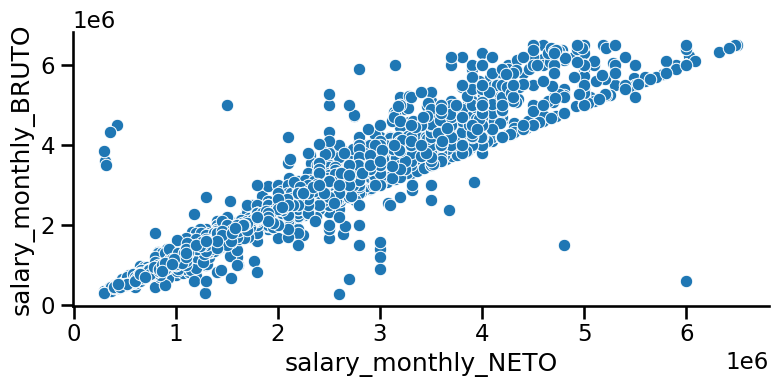

In [19]:
# Limpiamos los valores anomalos o erroneos del salario neto con respecto a los del bruto
df_filtered = df_filtered[df_filtered.salary_monthly_NETO<=max(df_filtered.salary_monthly_BRUTO)]
df_filtered = df_filtered[df_filtered.salary_monthly_NETO>=min(df_filtered.salary_monthly_BRUTO)]

seaborn.pairplot(data=df_filtered, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)

Los primero que podemos notar de la grafica anterior es que obviamente algunos cargaron mal sus datos, ya que (queremos creer) nadie recibe mas de la mitad de su sueldo en descuentos, ni nadie cobra mas de neto que de bruto.  
 Arreglemos esto.

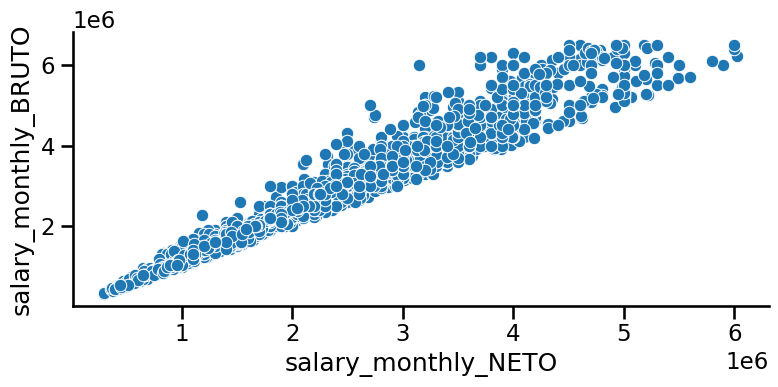

In [20]:
# quitamos los valores de neto mayor al bruto y de neto menor a la mitad del bruto
df_filtered = df_filtered[df_filtered.salary_monthly_NETO<df_filtered.salary_monthly_BRUTO]
df_filtered = df_filtered[df_filtered.salary_monthly_NETO>df_filtered.salary_monthly_BRUTO/2]

seaborn.pairplot(data=df_filtered, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)

In [21]:
promedio_neto = df_filtered['salary_monthly_NETO'].mean()
promedio_bruto = df_filtered['salary_monthly_BRUTO'].mean()
print('Promedio neto:',round(promedio_neto))
print('Promedio bruto:',round(promedio_bruto))
average_discount = 1-(promedio_neto/promedio_bruto)
print('Porcentaje de descuento promedio:',round(average_discount*100),'%')

Promedio neto: 2097957
Promedio bruto: 2543006
Porcentaje de descuento promedio: 18 %


Podemos ver que en promedio el neto es 18% mas pequeño que el bruto, esto se debe a que es el descuento estandar.

## c) Densidad condicional

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






ya habiamos hecho este analisis previamente, de todas formas volvamos a ver el grafico, esta vez con el salario neto, y ampliemos con las medidas de centralizacion y dispersion para las dos poblaciones mas numerosas.

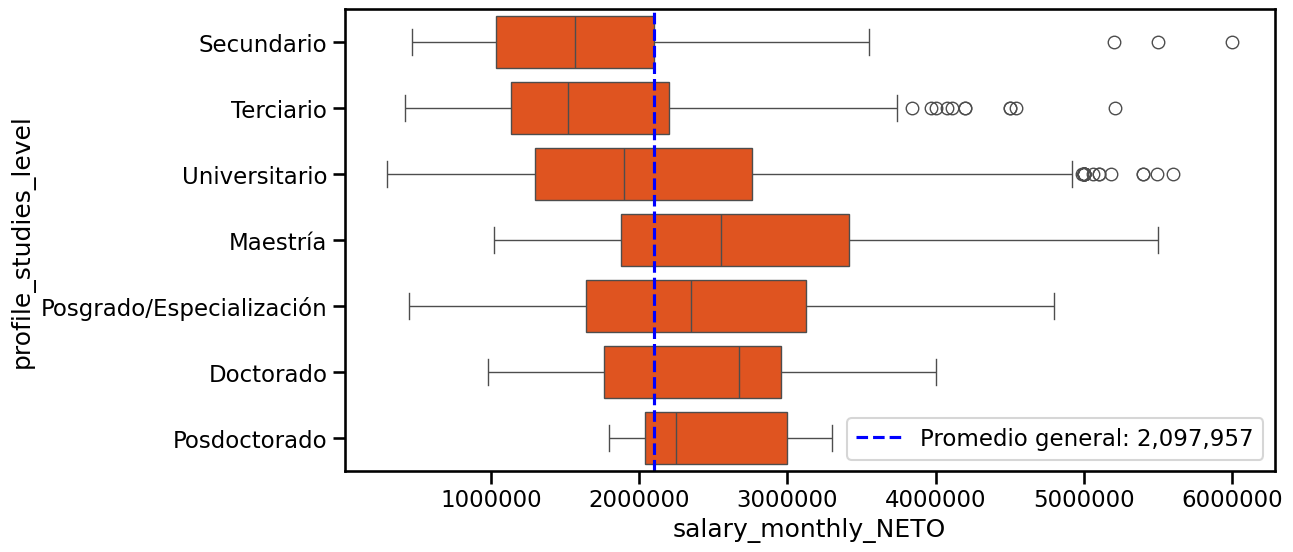

In [22]:
# Calculamos el promedio general (de toda la columna de salario)
mean_salary = df_filtered['salary_monthly_NETO'].mean()

# Graficamos el boxplot
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_filtered, x='salary_monthly_NETO', y='profile_studies_level', color='orangered', order=sorted_studies_levels)

# Línea vertical punteada en el promedio
plt.axvline(mean_salary, color='blue', linestyle='--', label=f'Promedio general: {mean_salary:,.0f}')

# Estilo del eje X
plt.ticklabel_format(style='plain', axis='x')

plt.legend()
plt.show()

Veamos cuales son los dos subconjuntos mas poblados.

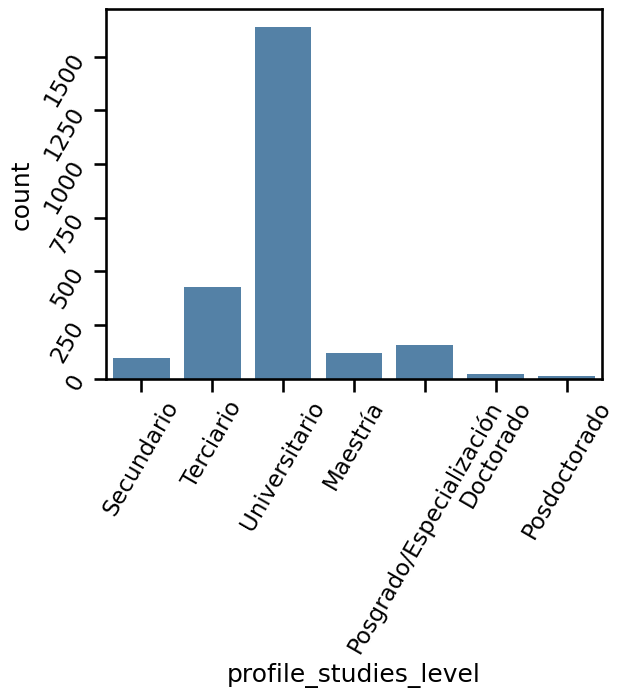

In [23]:
seaborn.countplot(x= df.profile_studies_level.dropna(), color='steelblue', order=sorted_studies_levels)
plt.tick_params(labelrotation=60)
plt.show()

Podemos ver que los dos grupos mas numerosos son el universitario y el terciario, apliemos en un grafico comparativo el sueldo neto de ambos grupos.

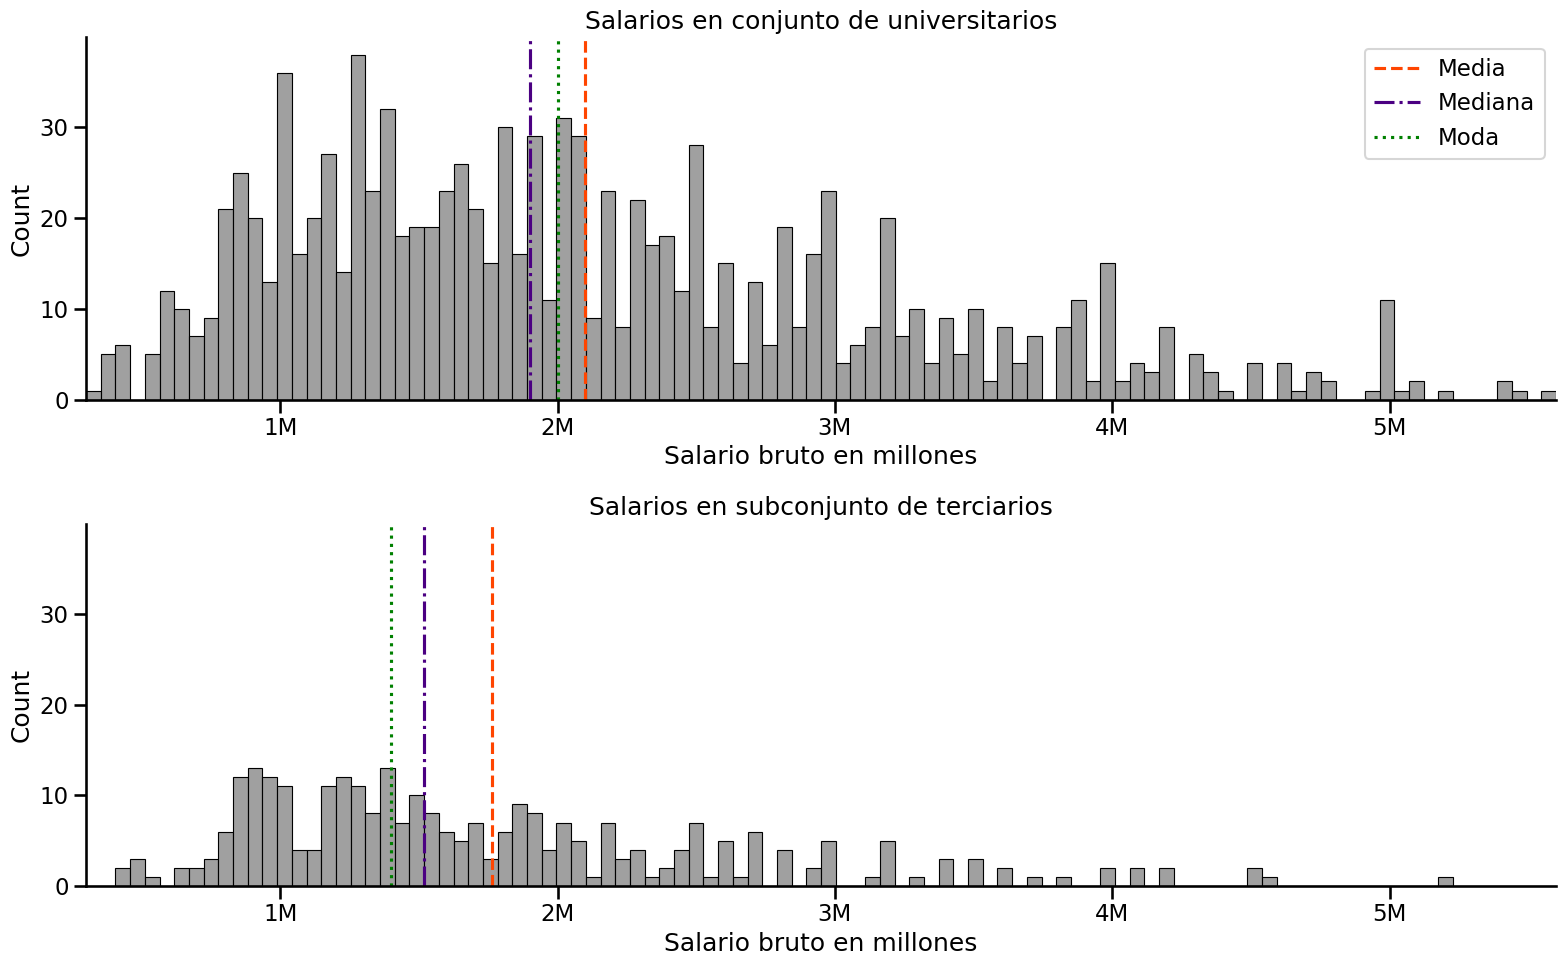

In [24]:
salary_col = 'salary_monthly_NETO'
df_universitaries = df_filtered[df_filtered['profile_studies_level'] == 'Universitario']
df_terciarios = df_filtered[df_filtered['profile_studies_level'] == 'Terciario']


# 1. Calcular el mínimo y máximo global
x_min = min(df_universitaries[salary_col].min(), df_terciarios[salary_col].min())
x_max = max(df_universitaries[salary_col].max(), df_terciarios[salary_col].max())

# 2. Definir bins comunes (ejemplo: 100 bins)
n_bins = 100
bins = numpy.linspace(x_min, x_max, n_bins + 1)

# 3. Crear subplots comparables
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))

# Gráfico para universitarios
seaborn.histplot(df_universitaries[salary_col], bins=bins, ax=axes[0], color='gray')
axes[0].axvline(df_universitaries[salary_col].mean(), color='orangered', linestyle='--', label='Media')
axes[0].axvline(df_universitaries[salary_col].median(), color='indigo', linestyle='-.', label='Mediana')
axes[0].axvline(df_universitaries[salary_col].mode().iloc[0], color='green', linestyle=':', label='Moda')
axes[0].set_title("Salarios en conjunto de universitarios")

# Gráfico para df_filtered
seaborn.histplot(df_terciarios[salary_col], bins=bins, ax=axes[1], color='gray')
axes[1].axvline(df_terciarios[salary_col].mean(), color='orangered', linestyle='--', label='Media')
axes[1].axvline(df_terciarios[salary_col].median(), color='indigo', linestyle='-.', label='Mediana')
axes[1].axvline(df_terciarios[salary_col].mode().iloc[0], color='green', linestyle=':', label='Moda')

axes[1].set_title("Salarios en subconjunto de terciarios")

# 4. Ajustar límites del eje X e Y para que sean iguales en ambos
y_max = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
for ax in axes:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)
    ax.set_xlabel("Salario bruto en millones")
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))

# Mostrar leyenda y mejorar visual
axes[0].legend()
seaborn.despine()
plt.tight_layout()
plt.show()


Podemos notar en la comparativa que los universitarios gozan de un mayor sueldo neto que los terciarios ya que todas sus medidas de tendencia central son mayores. Pero que sucede con las de dispersion?

In [25]:
print('En el caso de los Universitarios:')

media = df_universitaries[salary_col].mean()
varianza = df_universitaries[salary_col].var()
desviacion = df_universitaries[salary_col].std()
coef_variacion = (desviacion / media) * 100

print(f"Varianza muestral: {varianza:,.2f}")
print(f"Desviación estándar: {desviacion:,.2f}")
print(f"Coeficiente de variación: {coef_variacion:.2f}%")

print('-----------------------------')
print('En el caso de los Terciarios:')

media = df_terciarios[salary_col].mean()
varianza = df_terciarios[salary_col].var()
desviacion = df_terciarios[salary_col].std()
coef_variacion = (desviacion / media) * 100

print(f"Varianza muestral: {varianza:,.2f}")
print(f"Desviación estándar: {desviacion:,.2f}")
print(f"Coeficiente de variación: {coef_variacion:.2f}%")

En el caso de los Universitarios:
Varianza muestral: 1,110,208,248,233.99
Desviación estándar: 1,053,664.20
Coeficiente de variación: 50.18%
-----------------------------
En el caso de los Terciarios:
Varianza muestral: 765,322,186,007.84
Desviación estándar: 874,826.95
Coeficiente de variación: 49.63%


de este ultimo analisis podemos ver que los sueldos universitarios tienen una mayor dispersion que los terciarios, por lo que los datos se encuentran un poco mas concentrados en el caso de los terciarios.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica.
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Como variables numericas, elegiremos el salario bruto y los años de experiencia, y como variable categorica la universidad 🏛️ en que se formo el candidato. Esto quiere decir que estaremos especificamente analizando el subconjunto de encuestados con estudios academicos superiores, ademas agruparemos dicha categoria segun si el establecimiento academico es publico o privado.

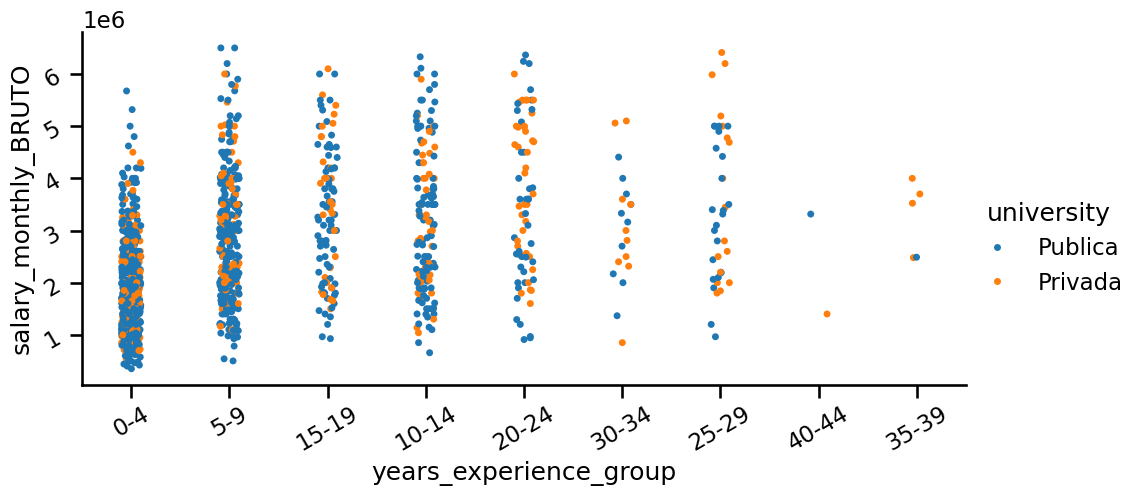

In [29]:
# Agrupación de universidades segun si es publica o privada
df_filtered['university'] = df_filtered['profile_university'].replace({
        'UTN - Universidad Tecnológica Nacional': 'Publica',
       'UBA - Universidad de Buenos Aires': 'Publica',
       'UCAECE - Centro de Altos Estudios en Ciencias Exactas': 'Privada',
       'UNLaM - Universidad Nacional de La Matanza': 'Publica',
       'UNS - Universidad Nacional del Sur': 'Publi
       'Universidad Siglo 21': 'Privada',
       'UAI - Universidad Abierta Interamericana': 'Privada',
       'UNQ - Universidad Nacional de Quilmes': 'Publica',
       'UADE - Universidad Argentina De la Empresa': 'Privada',
       'USAL - Universidad del Salvador': 'Privada',
       'UNSAM - Universidad de San Martín': 'Publica',
       'UNR - Universidad Nacional de Rosario': 'Publica',
       'UP - Universidad de Palermo': 'Privada',
       'UK - Universidad Kennedy': 'Privada',
       'UNC - Universidad Nacional de Córdoba': 'Publica',
       'ITBA Instituto Tecnológico de Buenos Aires': 'Privada',
        'ORT': 'Privada',
       'UNLA - Universidad Nacional de Lanús': 'Publica',
       'UNLP - Universidad Nacional de La Plata': 'Publica',
       'UNTREF - Universidad Tres de Febrero': 'Publica',
       'UNRC - Universidad Nacional de Río Cuarto': 'Publica',
       'IUA - Instituto Universitario Aeronáutico': 'Privada',
       'UNICEN - Universidad Nacional del Centro de la Provincia de Buenos Aires': 'Publica',
       'UNGS - Universidad Nacional de General Sarmiento': 'Publica',
       'UNJu - Universidad Nacional de Jujuy': 'Publica',
       'UCES - Universidad de Ciencias Empresariales y Sociales': 'Privada',
       'ISTEA - Instituto Superior Tecnológico Empresarial Argentino': 'Privada',
       'UBP - Universidad Blas Pascal': 'Privada',
        'UB - Universidad de Belgrano': 'Privada',
       'UNCUYO - Universidad Nacional de Cuyo': 'Publica',
        'Universidad Maimónides': 'Privada',
       'UNRN - Universidad Nacional de Río Negro': 'Publica',
       'UNSL - Universidad Nacional de San Luis': 'Publica',
       'UM - Universidad de Morón': 'Privada',
       'UNAB - Universidad de Almirante Brown': 'Publica',
        'Escuela Da Vinci': 'Privada',
       'UNCOMA - Universidad Nacional del Comahu': 'Publica',
       'UNLaR - Universidad Nacional De La Rioja': 'Publica',
       'UCA - Universidad Católica Argentina': 'Privada',
       'UNNNE - Universidad Nacional del Nordeste': 'Publica',
       'ESBA - Escuela Superior Buenos Aires': 'Privada',
       'UNL - Universidad Nacional del Litoral': 'Publica',
       'UAP - Universidad Adventista del Plata': 'Privada',
       'UADER - Universidad Autónoma de Entre Ríos': 'Publica',
       'UNNOBA - Universidad Nacional del Noroeste de la Provincia de Buenos Aires': 'Publica',
       'ISSD - Instituto Superior Santo Domingo': 'Privada'
})

# Agrupamos los años de experiencia en intervalos de 5 años
df_filtered['years_experience_group'] = (df_filtered['profile_years_experience'] // 5) * 5
df_filtered['years_experience_group'] = df_filtered['years_experience_group'].astype(str) + '-' + (df_filtered['years_experience_group'] + 4).astype(str)

# Scatter plot showing the relationship between 'sugarpercent' and 'winpercent'
seaborn.catplot(x=df_filtered['years_experience_group'] , y=df_filtered['salary_monthly_BRUTO'],  hue=df_filtered['university'], height=5, aspect=2) # Your code here
plt.tick_params(labelrotation=30)

Como podemos visualizar en el grafico no existe gran diferencia segun el origen del encuestado. sin embargo vemos que a mas años de experiencia hay mas frecuencia de encuestados provenientes de establecimientos privados y en general hay encuestados provenientes de establecimientos publicos con mejores sueldos.